In [8]:
import csv
import pandas as pd
import ast

# Manually define headers
headers = ["number", "id", "type", "content", "speaker", "job_title", "state",
           "party", "barely_true", "false", "half_true", "mostly_true", "pants_on_fire",
           "context","yap"]
# Read the TSV file and process rows
with open("liar_dataset_cleaned.csv") as file:
    reader = csv.reader(file)
    next(reader)
    rows = list(reader)  # Read all rows
    

# Dictionary for label conversion
convert = {
    '': "skip", 'true': 'reliable', 'half-true': 'skip', 'pants-fire': 'fake',
    'mostly-true': 'reliable', 'barely-true': 'fake', 'mostly-true': 'reliable',
    'false': 'fake'
}

# Filter rows based on category
filtered_rows = []
fakeCount = realCount = 0

for row in rows:
    content = row[2]  # Extract category from the fourth column
        
    row[2] = convert[row[2]]  # Convert category using the dictionary


    if len(row) < len(headers):  # Handle missing data cases
        print(row)
        continue


    if row[2] == 'fake':
        fakeCount += 1
    elif row[2] == 'reliable':
        realCount += 1

    if row[2] != "skip":  # Keep only valid rows
        filtered_rows.append(row)

# Create DataFrame with defined headers
df = pd.DataFrame(filtered_rows, columns=headers)

# Save to CSV with headers
df.to_csv('liars_fr.csv', index=False)
print(f"fake: {fakeCount/(fakeCount+realCount)}")
print(f"real: {realCount/(fakeCount+realCount)}")


fake: 0.5523012552301255
real: 0.4476987447698745
Average length of content: 10.39

Content Length Statistics:
count    8126.000000
mean       10.391336
std         5.726952
min         1.000000
25%         7.000000
50%        10.000000
75%        13.000000
max       276.000000
Name: content_length, dtype: float64

Content Length Distribution:
content_length
1        7
2       40
3      105
4      235
5      401
6      676
7      753
8      870
9      868
10     720
11     689
12     616
13     476
14     380
15     337
16     250
17     186
18     146
19     122
20      79
21      42
22      46
23      19
24      15
25      11
26      11
27       4
28       5
29       3
30       1
31       1
32       4
34       1
37       1
39       1
43       1
44       1
139      1
184      1
276      1
Name: count, dtype: int64


Content Length Statistics:
count    8126.000000
mean       10.391336
std         5.726952
min         1.000000
25%         7.000000
50%        10.000000
75%        13.000000
max       276.000000
Name: content_length, dtype: float64

Most Common Content List Lengths:
content_length
8     870
9     868
7     753
10    720
11    689
Name: count, dtype: int64

Percentage of Content List Lengths:
content_length
8     10.706375
9     10.681762
7      9.266552
10     8.860448
11     8.478956
Name: proportion, dtype: float64

Extreme Cases:
Minimum length: 1
Maximum length: 276
Top 5 longest content lists:
      content_length                                            content
1014             276  [hospit, doctor, mri, surgeri, forth, exten, u...
5986             184  [vast, major, money, got, small, donor, across...
4877             139  [georgia, restrict, ballot, access, law, count...
1738              44  [fact, although, presid, oppo, abort, last, ei...
7908              43  [barbara, bu

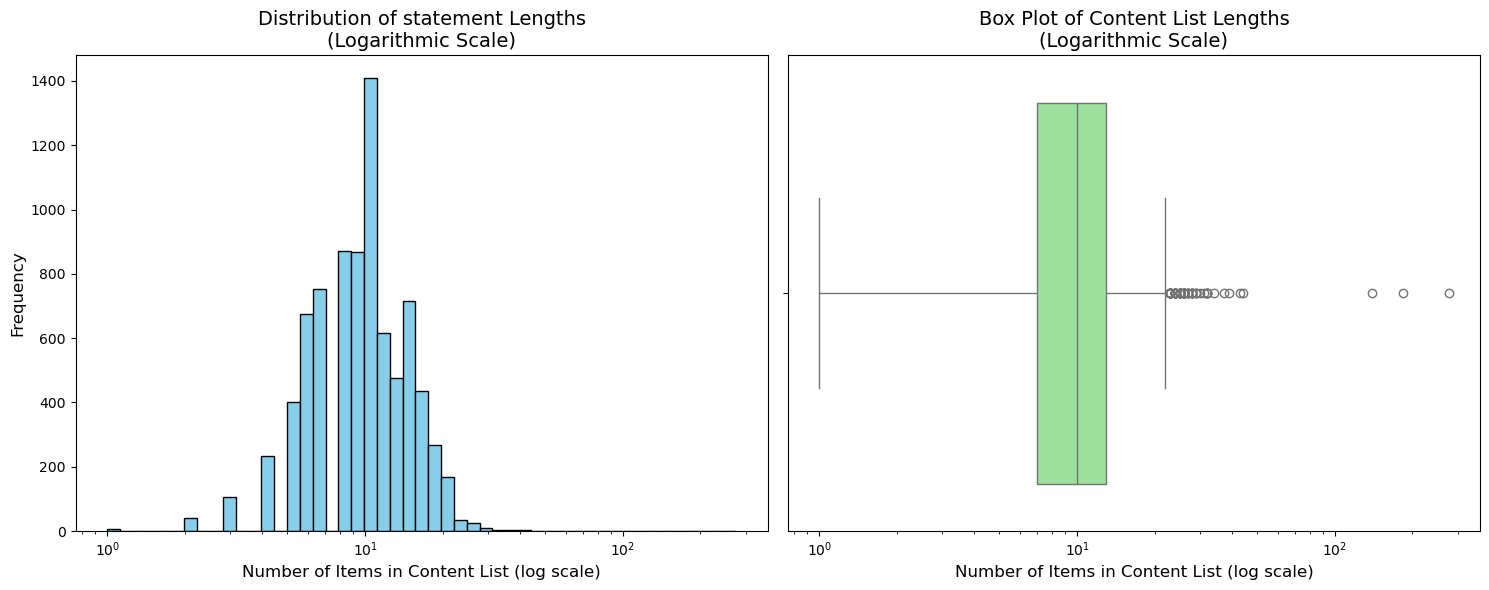

In [17]:
import csv
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Read the CSV file
df = pd.read_csv("liars.csv")

# Convert the 'content' column from string representation to actual list
df['content'] = df['content'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Calculate the length of each content list
df['content_length'] = df['content'].apply(len)

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Histogram with logarithmic x-axis
plt.subplot(1, 2, 1)
# Use log scale for x-axis
lengths = df['content_length']
plt.hist(lengths, bins=np.logspace(np.log10(lengths.min()), np.log10(lengths.max()), 50), 
         color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of statement Lengths\n(Logarithmic Scale)', fontsize=14)
plt.xlabel('Number of Items in Content List (log scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Box plot with logarithmic x-axis
plt.subplot(1, 2, 2)
sns.boxplot(x=lengths, color='lightgreen')
plt.xscale('log')
plt.title('Box Plot of Content List Lengths\n(Logarithmic Scale)', fontsize=14)
plt.xlabel('Number of Items in Content List (log scale)', fontsize=12)

# Adjust layout and save
plt.tight_layout()
plt.savefig('content_length_log_analysis.png')

# Print detailed statistics
print("Content Length Statistics:")
print(lengths.describe())

# Additional insights
print("\nMost Common Content List Lengths:")
length_counts = lengths.value_counts().head()
print(length_counts)

# Percentage of lengths
length_percentages = lengths.value_counts(normalize=True) * 100
print("\nPercentage of Content List Lengths:")
print(length_percentages.head())

# Identify extreme cases
print("\nExtreme Cases:")
print("Minimum length:", lengths.min())
print("Maximum length:", lengths.max())
print("Top 5 longest content lists:")
print(df.nlargest(5, 'content_length')[['content_length', 'content']])

Content Length Statistics:
count     805.000000
mean      318.201242
std       228.366837
min         3.000000
25%       176.000000
50%       285.000000
75%       443.000000
max      1862.000000
Name: content_length, dtype: float64

Most Common Content List Lengths:
content_length
3      99
352     5
140     5
277     5
371     5
Name: count, dtype: int64

Percentage of Content List Lengths:
content_length
3      12.298137
352     0.621118
140     0.621118
277     0.621118
371     0.621118
Name: proportion, dtype: float64

Extreme Cases:
Minimum length: 3
Maximum length: 1862
Top 5 longest content lists:
     content_length                                            content
537            1862  [spi, lie, meant, get, caught, wet, friday, ev...
802            1466  [three, isra, hostag, five, thai, nation, held...
417            1204  [yoga, teacher, almost, die, southport, attack...
321            1137  [uk, rank, best, countri, world, endoflif, car...
691            1110  [warn, conta

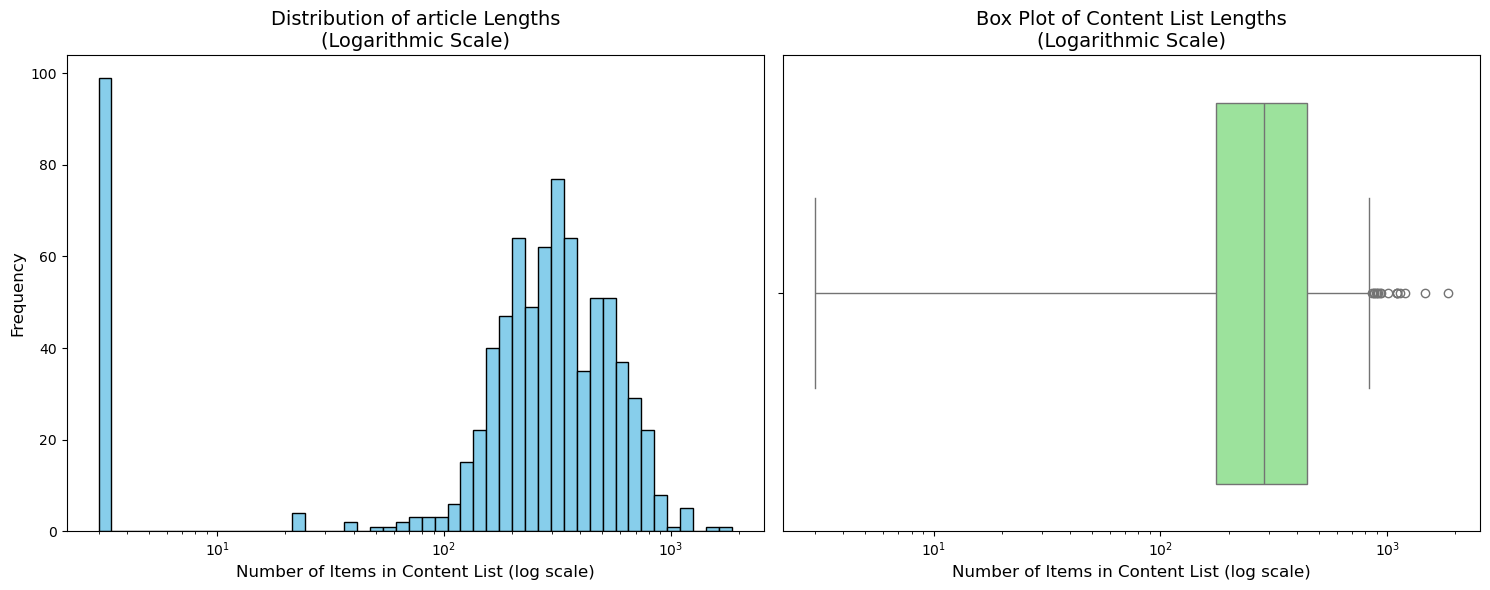

In [18]:
import csv
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Read the CSV file
df = pd.read_csv("bbc_cleaned_fr.csv")

# Convert the 'content' column from string representation to actual list
df['content'] = df['content'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Calculate the length of each content list
df['content_length'] = df['content'].apply(len)

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Histogram with logarithmic x-axis
plt.subplot(1, 2, 1)
# Use log scale for x-axis
lengths = df['content_length']
plt.hist(lengths, bins=np.logspace(np.log10(lengths.min()), np.log10(lengths.max()), 50), 
         color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of article Lengths\n(Logarithmic Scale)', fontsize=14)
plt.xlabel('Number of Items in Content List (log scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Box plot with logarithmic x-axis
plt.subplot(1, 2, 2)
sns.boxplot(x=lengths, color='lightgreen')
plt.xscale('log')
plt.title('Box Plot of Content List Lengths\n(Logarithmic Scale)', fontsize=14)
plt.xlabel('Number of Items in Content List (log scale)', fontsize=12)

# Adjust layout and save
plt.tight_layout()
plt.savefig('content_length_log_analysis.png')

# Print detailed statistics
print("Content Length Statistics:")
print(lengths.describe())

# Additional insights
print("\nMost Common Content List Lengths:")
length_counts = lengths.value_counts().head()
print(length_counts)

# Percentage of lengths
length_percentages = lengths.value_counts(normalize=True) * 100
print("\nPercentage of Content List Lengths:")
print(length_percentages.head())

# Identify extreme cases
print("\nExtreme Cases:")
print("Minimum length:", lengths.min())
print("Maximum length:", lengths.max())
print("Top 5 longest content lists:")
print(df.nlargest(5, 'content_length')[['content_length', 'content']])